In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Load the CSV
df = pd.read_csv("Untitled spreadsheet - emoji_dataset.csv")

# Show first few rows
df.head()


,sentence,emoji
0,Taha is yawning all day,😴
1,Taha likes CyberGen AI Boot Camp,🎉
2,I am unsure right now,🤔
3,I felt happy when my code runs,😂
4,I am sleepy,😴


In [6]:
import string

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply preprocessing
df['sentence'] = df['sentence'].apply(preprocess)


In [7]:
X = df['sentence']
y = df['emoji']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Predictions
y_pred = model.predict(X_test_vec)

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          ❤️       0.67      0.80      0.73         5
           🎉       1.00      1.00      1.00         3
           👍       1.00      1.00      1.00         5
           😂       1.00      0.86      0.92         7
           😡       0.67      0.57      0.62         7
           😢       1.00      0.80      0.89         5
           😴       1.00      1.00      1.00         4
           🤔       0.67      1.00      0.80         4

    accuracy                           0.85        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.87      0.85      0.85        40



D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\JupyterProject\.ipynb

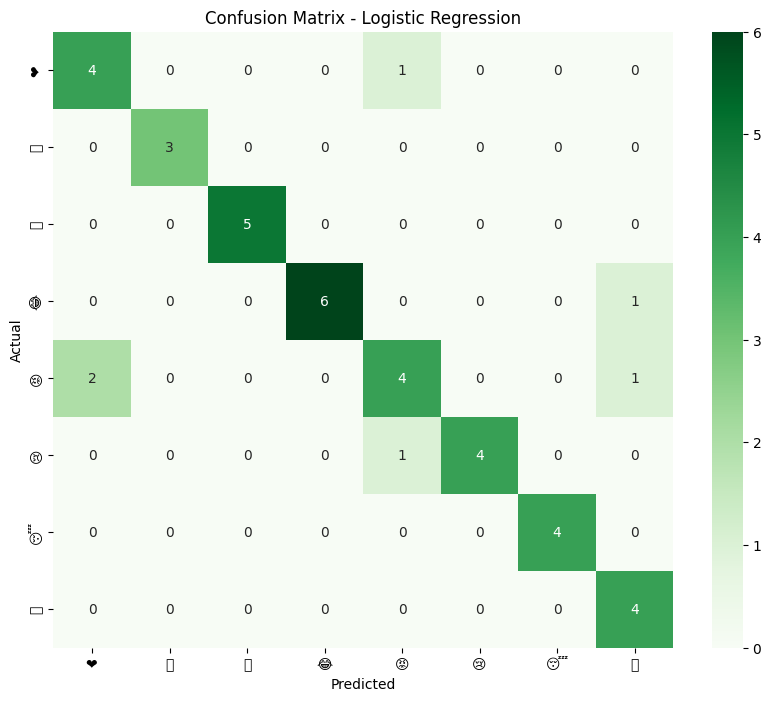

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
# Try on new examples
examples = [
    "I'm so excited today",
    "I'm hungry",
    "This is amazing",
    "Best day ever!",
    "Taha Likes Cybergen"
]

examples_cleaned = [preprocess(s) for s in examples]
examples_vec = vectorizer.transform(examples_cleaned)
predicted_emojis = model.predict(examples_vec)

for i, sentence in enumerate(examples):
    print(f"Sentence: {sentence}")
    print(f"Predicted Emoji: {predicted_emojis[i]}")
    print("------")


Sentence: I'm so excited today
Predicted Emoji: 😢
------
Sentence: I'm hungry
Predicted Emoji: 🎉
------
Sentence: This is amazing
Predicted Emoji: 😡
------
Sentence: Best day ever!
Predicted Emoji: 😴
------
Sentence: Taha Likes Cybergen
Predicted Emoji: 🎉
------
